## SMOTE Upsampling (Synthetic Minority Oversampling Technique)

### Used in ML to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances

In [1]:
from sklearn.datasets import make_classification

In [19]:
hi = make_classification(n_samples=1000, 
                    n_features=2,
                    n_redundant=0,
                    n_clusters_per_class=1,
                   weights=[0.90], #1 class 90 more than other class wrt output featues so it becomes imbalanced dataset
                   random_state=12)

In [30]:
print(hi[0])

[[-0.76289759 -0.70680807]
 [-1.07543571 -1.0511621 ]
 [-0.61011459 -0.90980157]
 ...
 [-1.32643852 -1.815178  ]
 [-0.83348573 -0.5146474 ]
 [-0.30287558 -0.57597532]]


In [31]:
print(hi[1])

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 

In [4]:
X, y = make_classification(n_samples=1000, 
                    n_features=2,
                    n_redundant=0,
                    n_clusters_per_class=1,
                   weights=[0.90], #1 class 90 more than other class wrt output featues so it becomes imbalanced dataset
                   random_state=12)

In [5]:
import pandas as pd

df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df1, df2], axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [6]:
final_df['target'].value_counts() # imbalanced

target
0    900
1    100
Name: count, dtype: int64

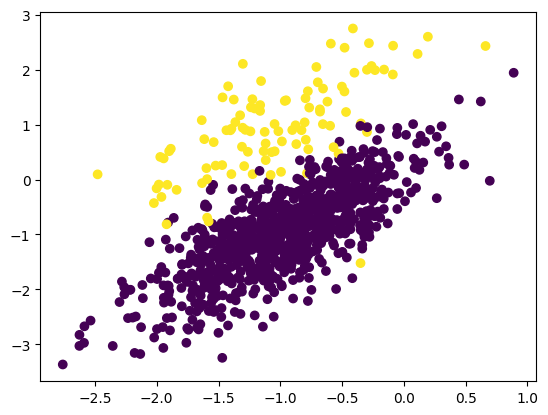

In [7]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

In [8]:
from imblearn.over_sampling import SMOTE

In [9]:
## transform the dataset

oversample = SMOTE()
X,y = oversample.fit_resample(final_df[['f1', 'f2']], #independent features
                              final_df['target']) #target feature

In [10]:
X.shape

(1800, 2)

In [11]:
y.shape

(1800,)

In [14]:
len(y[y==0])

900

In [15]:
len(y[y==1])

900

In [16]:
df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df1, df2], axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


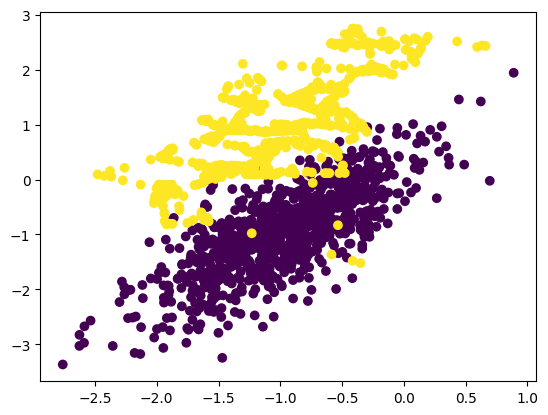

In [17]:
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])